# Visualización de Redes

Hay redes por todas partes, redes de carreteras, una red de amigos y seguidores en los medios sociales, y una red de compañeros de oficina. Están desempeñando un papel importante en nuestra vida cotidiana, desde la difusión de información útil hasta la influencia en las elecciones nacionales. La capacidad de analizar estas redes y tomar decisiones informadas basadas en ellas es una habilidad que es importante para cualquier analista de datos.

Para el trabajo y visualización de datos representados como redes, se recomienda el uso de la librería de [NetworkX](https://networkx.github.io/documentation/), que facilita mucho el trabajo con este tipo de datos.

El visualizar este tipo de estrcuturas permite comprobar rápidamente elementos similares, la distancia entre los mismos, puntos que funcionan como hubs o concentradores de la red... etc.

Puesto que no es el objetivo de esta asignatura conocer las características del análisis de redes, simplemente se ofrecen algunos ejemplos de visualización de las mismas, en caso de necesitar conocerlas en un futuro. El esquema de representación más utilizado es: 
1. Se realiza el trabajo de carga, organización y análisis de los datos empleando `NetworkX`.
2. Se representa el resultado empleando `matplotlib`.

Se empieza como siempre por importar las librerías necesarias.

En caso de trabajar en Google Colaboratory, es posible que se necesiten instalar por medio de `pip`.

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

## Uso básico de la librería

### Grafos

En la bilbioteca NetworkX, la estructura principal que almacena los grafos es `Graph`. Al crearla inicialmente, esta estará vacía. 

Cuando se empiecen a incluir datos, almacenará de dos tipos:
* Nodos
* Vértices

In [25]:
G = nx.Graph()
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0



### Nodos
El gráfico G puede crecer de varias maneras. NetworkX incluye muchas funciones para generar de gráfos y métodos de ayuda para leer y escribir gráfs en muchos formatos. Para empezar, sin embargo, vamos a ver las manipulaciones simples. 

* Se puede añadir un nodo a la vez,

In [26]:
G.add_node(1)

* Se puede añadir una lista de nodos

In [27]:
G.add_nodes_from([2, 3])

* o añadir cualquier contenedor iterable de nodos. También puede añadir nodos junto con atributos de nodos si su contenedor produce tuplas de 2 elementos (nodo, nodo_atributo_dict). Los atributos de los nodos se tratan más adelante.

In [28]:
H = nx.path_graph(10)
G.add_nodes_from(H)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 0
Average degree:   0.0000


El gráfico G ahora contiene H como nodo. Esta flexibilidad es muy poderosa ya que permite gráficos de gráficos, gráficos de archivos, gráficos de funciones y mucho más. Vale la pena pensar en cómo estructurar una aplicación para que los nodos sean entidades útiles.

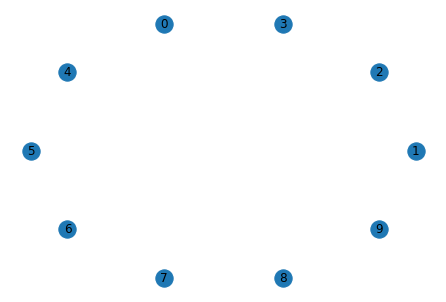

In [29]:
nx.draw_shell(G, with_labels=True)

### Vértices

También se puede construir la estructura de conexiones en el grafo

* un vertice cada vez
* añadiendo una lista de éstos
* o añadiendo un `ebunch` de bordes. Un `ebunch` es un contenedor iterable de tuplas de vértice. 
Una tupla de vértice puede ser una 2-tuple de nodos o un 3-tuple con 2 nodos seguidos de un diccionario de atributos del propio vértice, por ejemplo, `(2, 3, {'peso': 3.1415})`.

In [30]:
# un solo vertice
G.add_edge(1, 2)

e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

# lista de vertices
G.add_edges_from([(1, 2), (1, 3)])

Como se puede observar, el hecho de incluir elementos que ya existen en el grafo no produce errores, simplemente se ignoran.

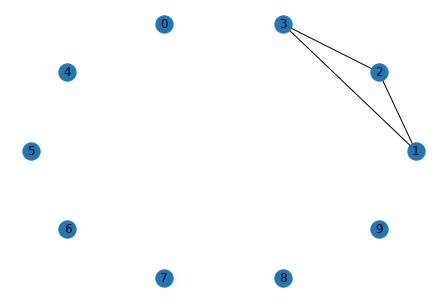

In [31]:
nx.draw_shell(G, with_labels=True)

## Carga de datos

Como siempre, la funcionalidad que más nos puede interesar es la de cargar directamente datos que nos facilitan de forma externa.

Existen varios formatos en los que se pueden almacenar y recuperar los datos. Se puede encontrar una lista completa en la [documentación oficial](https://networkx.github.io/documentation/stable/reference/readwrite/index.html).  

Quizá los que más podamos emplear sean los basados en texto: 
* Lista de Adyacencia: 
Consiste en texto plano, en el que cada linea contiene una lista de id de nodos.  
* Lista de Adyacencia Multilinea: La primera etiqueta en una línea es la etiqueta del nodo fuente seguida del grado del nodo `d`. Las siguientes `d` líneas son etiquetas de nodo de destino y datos de vértices opcionales. Este patrón se repite para todos los nodos del gráfico.
* Lista de Vértices: Con el formato de lista de vértices se pueden almacenar datos de vértice simples, pero no datos de nodos o grafos. No hay forma de representar nodos aislados a menos que el nodo tenga un borde de bucle automático.

Para cada tipo de formato, la biblioteca nos ofrece métodos diferentes para importarlos sobre un objeto de tipo Grafo. en el ejemplo, se lee un fichero de relaciones de Facebbok.

In [32]:
data_dir = '../data/relaciones/'
G_fb = nx.read_edgelist(data_dir+'facebook_combined.txt', create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


## Representación de los Grafos

NetworkX proporciona funcionalidad básica para la visualización de gráficos, pero su objetivo principal es permitir el análisis de gráficos en lugar de realizar la visualización de gráficos. En el futuro, es posible que la funcionalidad de visualización de gráficos se elimine de NetworkX o que sólo esté disponible como un paquete adicional.

Una visualización adecuada de las gráficas es difícil, y recomendamos encarecidamente que las personas visualicen sus gráficas con herramientas dedicadas a esa tarea. Ejemplos notables de herramientas de visualización de gráficos dedicadas y con todas las funciones son [Cytoscape](https://cytoscape.org/), [Gephi](https://gephi.org/), [Graphviz] ,etc. 

Para utilizar estas y otras herramientas de este tipo, se deberá exportar el gráfo de NetworkX a un formato que pueda ser leído por esas herramientas. Por ejemplo, Cytoscape puede leer el formato GraphML.

La librería `NetworkX` incluye actualmente un par de métodos que permiten la visualización del contenido del grafo con `matplotlib`. [Aquí](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.nx_pylab) pueden encontrarse todos.

Los más utilizados:
`draw(G[, pos, ax])` 
`draw_networkx(G[, pos, arrows, with_labels])`

Además, se puede especificar cual es el tipo de distribución que se quiere que tengan los nodos del grafo en el momento de esta representación. En el ejemplo que se muestra a continuación, se genera un subplot de `matplotlib` y se representa **el MISMO** grafo empleando las diferentes `layout` disponibles.

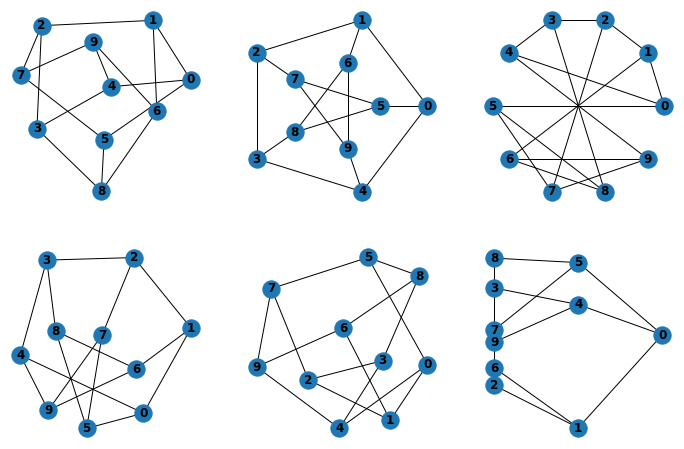

In [33]:
# NetworkX incluye varios tipos de generadores de grafos con características determinadas. Escogemos el tipo Petersen (al azar)
G = nx.petersen_graph()

fig, axarr = plt.subplots(2, 3, figsize=(12, 8))

plt.subplot(231)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(232)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

plt.subplot(233)
nx.draw(G, nx.circular_layout(G), with_labels=True, font_weight='bold')

plt.subplot(234)
nx.draw(G, nx.kamada_kawai_layout(G), with_labels=True, font_weight='bold')

plt.subplot(235)
nx.draw(G, nx.spring_layout(G), with_labels=True, font_weight='bold')

plt.subplot(236)
nx.draw(G, nx.spectral_layout(G), with_labels=True, font_weight='bold')

## Ejemplo de uso: Análisis de Redes Sociales

https://www.datacamp.com/community/tutorials/social-network-analysis-python
Obtenemos los datos de la página de la Univ. de Stanford: https://snap.stanford.edu/data/egonets-Facebook.html

Este conjunto de datos consiste en 'círculos' (o 'listas de amigos') de Facebook. Los datos de Facebook fueron recolectados de los participantes de la encuesta usando esta aplicación de Facebook. El conjunto de datos incluye características del nodo (perfiles), círculos y redes de ego. Los datos de Facebook se han anonimizado sustituyendo los identificadores internos del Facebook de cada usuario por un nuevo valor.

En nuestro caso, no nos interesa tanto el conocer los datos de cada usuario, sino las relaciones que aparecen entre ellos. Por eso solo nos concentramos en este apartado. De entre todos los formatos que se han comentado antes, los datos se nos presentan como una lista de vértices. 

In [40]:
data_dir = '../data/relaciones/'

In [41]:
G_fb = nx.read_edgelist(data_dir+'facebook_combined.txt', create_using = nx.Graph(), nodetype=int)

Podemos revisar algunas características básicas

In [42]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


Una vez cargada en el objeto Graph, podemos representarlo para tener una idea de su contenido.
(Puede llevar un rato generar la representación, al ser bastante grande).

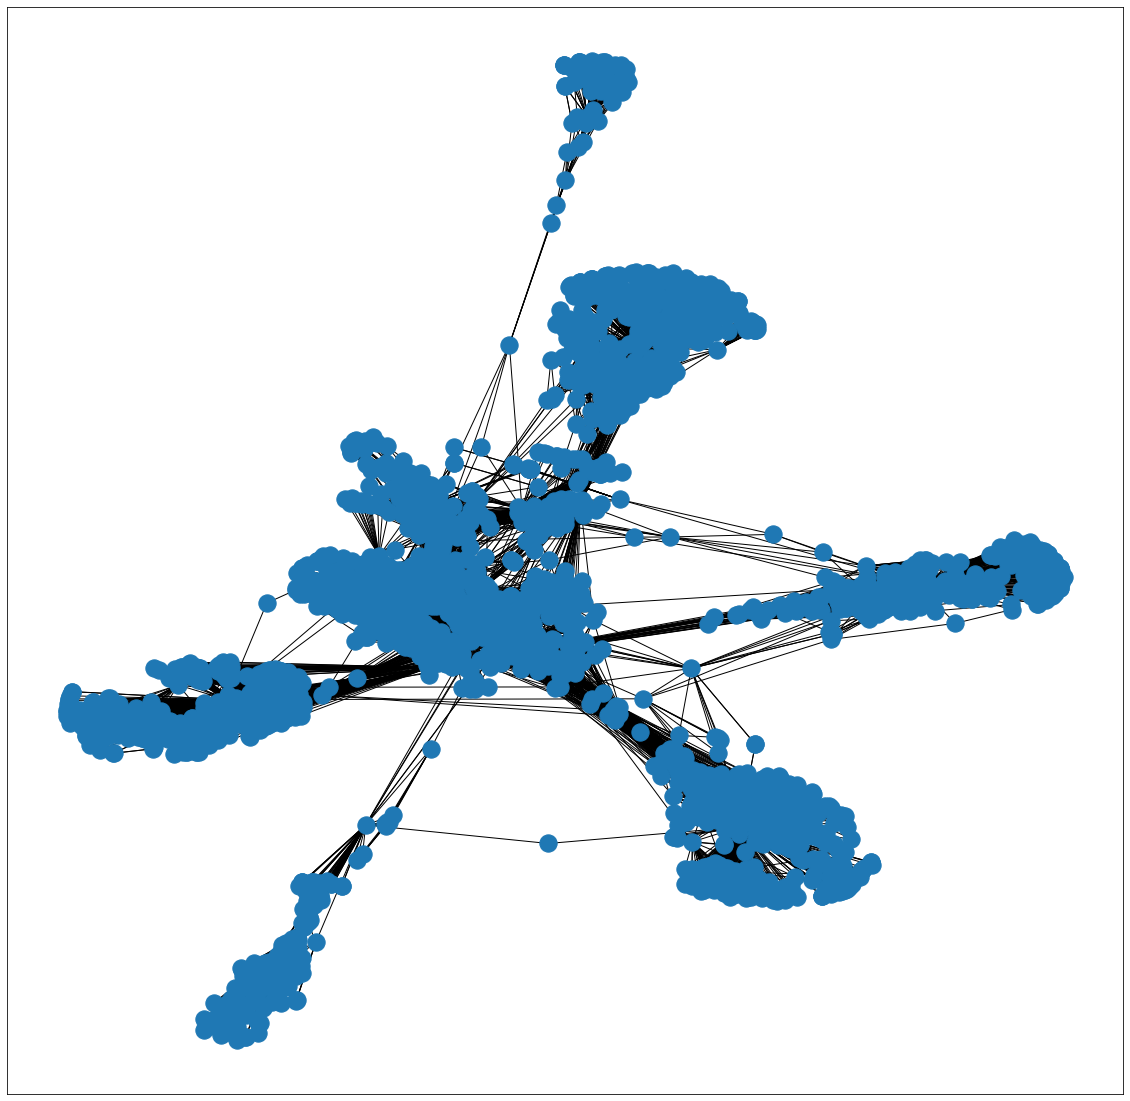

In [43]:
pos = nx.spring_layout(G_fb) # definimos la disposición

#Realizamos la representación
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False)

Combinando el análisis de datos del grafo que proporciona NetworkX con la visualización, podemos obtener una idea más clara de la información de que disponemos:

* Grado de un Nodo

El grado de un nodo define el número de conexiones que tiene un nodo. `NetworkX` contiene una función para el cálculo del grado, que podemos usar para determinar el grado de un nodo en la red. 
De alguna forma en nuestro caso, da una idea de cuantos 'amigos' o 'relaciones' tiene cada usuario de la red social.

* "Betweenness Centrality"

El cálculo de "Betweenness Centrality" proporciona una idea de la centralidad del control. Representa la frecuencia en la  un nodo aparece en el camino más corto que conecta un par de puntos; repetida para todos los pares de nodos del grafo. Cuantifica cuántas veces un nodo en particular viene en la ruta más corta elegida entre otros dos nodos. 
Los nodos de alta centralidad juegan un papel importante en el flujo de comunicación/información dentro de la red. Los nodos con alta centralidad pueden tener un control estratégico e influencia sobre otros. Un individuo en tal posición estratégica puede influir en todo el grupo, ya sea reteniendo o modificando la información en la transmisión.

Networkx contiene la función `betweenness_centrality()` para medirlo para la red.

In [44]:
# Cálculo del betweenness centrality de cada nodo del grafo
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)

In [45]:
# Modificamos las características de representación de los nodos en función de los calculos que realizamos sobre ellos

# El tamaño del nodo vendrá dado por el Betweenness Centrality de cada nodo
node_size =  [v * 10000 for v in betCent.values()]

# Se colorea cada nodo en función del número de conexiones
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]

(-0.46107789546319655,
 0.5251059201366585,
 -0.7986981355104926,
 1.0867244087610726)

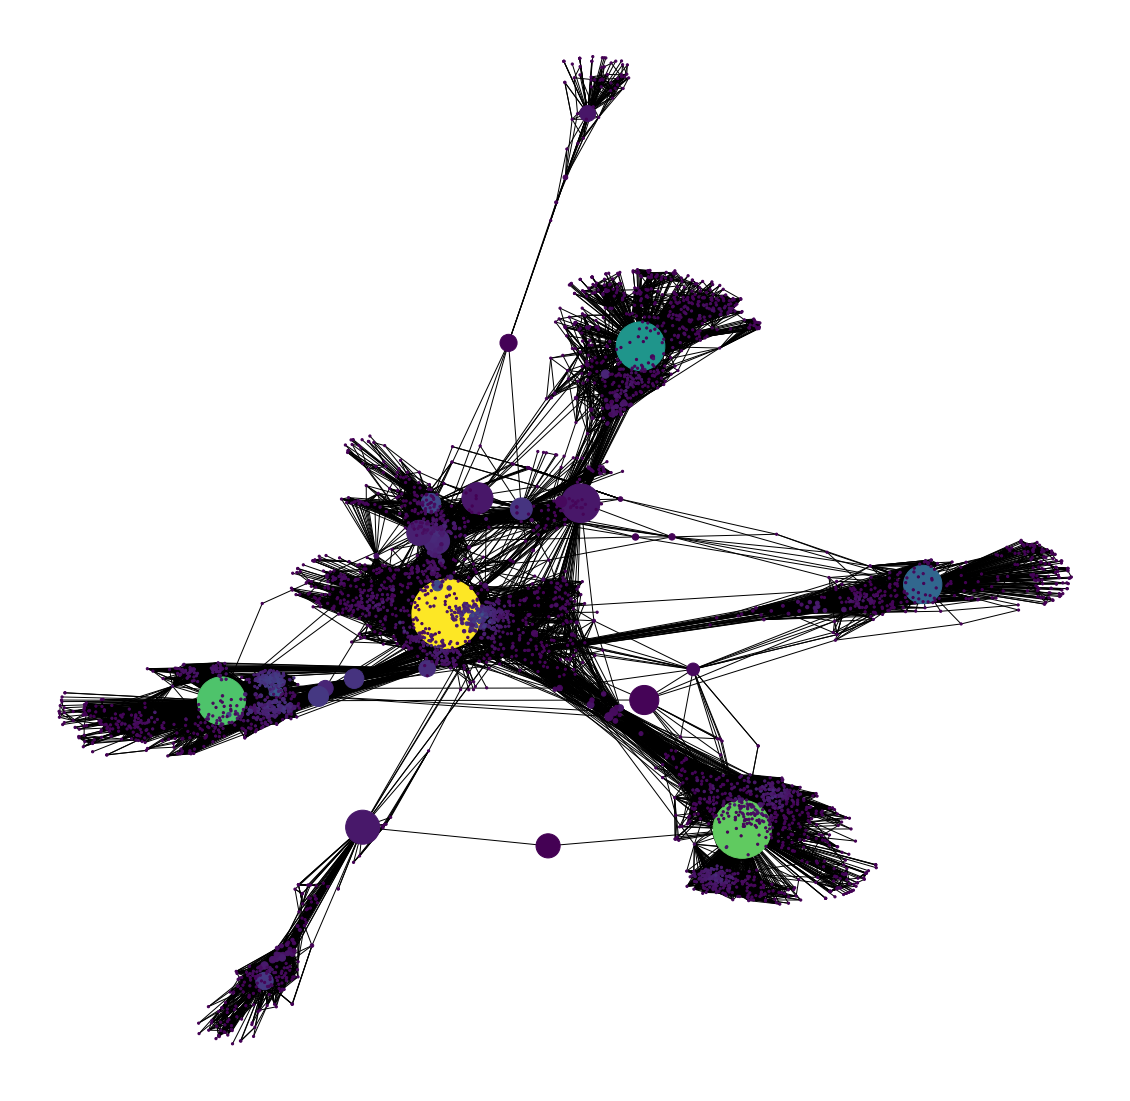

In [49]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

Se puede comprobar que tenemos el caso de varios individuos que tienen tanto un alto grado de conexiones como un alto valor en el grado de intermediación entre usuarios. 
Podríamos identificarlos fácilmente y éstos se suelen emplear como individuos que nos puede interesar contactar, en este caso, si se dispone de información que se desee hacer llegar al mayor número de usuarios posible.
Posteriormente se podría analizar si los individuos que se relacionan con éstos tienen alguna característica común o forman algún tipo de comunidad.

In [50]:
# Se puede conocer los 5 individuos con mayor centralidad
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]